In [1]:
%matplotlib inline


Pairwise sequence alignment of Avidin with Streptavidin
=======================================================

This script performs a pairwise sequence alignment of
avidin (*Gallus gallus*)
with streptavidin (*Streptomyces lavendulae*).


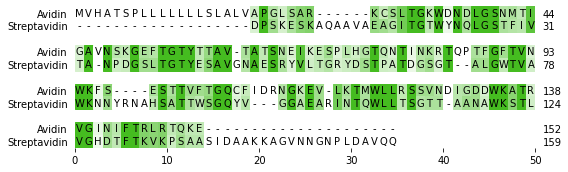

In [2]:
# Code source: Patrick Kunzmann
# License: BSD 3 clause

import matplotlib.pyplot as plt
import biotite.sequence as seq
import biotite.sequence.align as align
import biotite.sequence.io.fasta as fasta
import biotite.database.entrez as entrez
import biotite.sequence.graphics as graphics

# Download and parse protein sequences of avidin and streptavidin
fasta_file = fasta.FastaFile.read(entrez.fetch_single_file(
    ["CAC34569", "ACL82594"], None, "protein", "fasta"
))
for name, sequence in fasta_file.items():
    if "CAC34569" in name:
        avidin_seq = seq.ProteinSequence(sequence)
    elif "ACL82594" in name:
        streptavidin_seq = seq.ProteinSequence(sequence)

# Get BLOSUM62 matrix
matrix = align.SubstitutionMatrix.std_protein_matrix()
# Perform pairwise sequence alignment with affine gap penalty
# Terminal gaps are not penalized
alignments = align.align_optimal(avidin_seq, streptavidin_seq, matrix,
                                 gap_penalty=(-10, -1), terminal_penalty=False)

# Draw first and only alignment
# The color intensity indicates the similiarity
fig = plt.figure(figsize=(8.0, 2.5))
ax = fig.add_subplot(111)
graphics.plot_alignment_similarity_based(
    ax, alignments[0], matrix=matrix, labels=["Avidin", "Streptavidin"],
    show_numbers=True, show_line_position=True
)
fig.tight_layout()

plt.show()